<a href="https://colab.research.google.com/github/EmamulHossen/Logistic_Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Modules**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/shoe.csv")

In [ ]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [ ]:
df.tail()

,size(cm),class(y)
35,9.30,Female
36,9.21,Female
37,10.56,Male
38,9.60,Female
39,9.32,Male


In [ ]:
df.shape # Shape of the Dataset

(40, 2)

In [ ]:
df.columns #In this dataset has two columns.

Index(['size(cm)', 'class(y)'], dtype='object')

In [ ]:
df["class(y)"].value_counts()

Male      22
Female    18
Name: class(y), dtype: int64

<Axes: xlabel='class(y)', ylabel='count'>

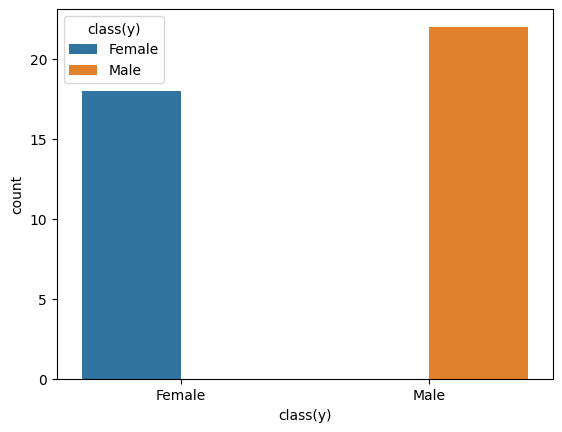

In [ ]:
sns.countplot(x=df["class(y)"],hue="class(y)",data=df)

In [ ]:
df.isnull().sum() # Check the null value.

size(cm)    0
class(y)    0
dtype: int64

**Checking Duplicate Value**

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum() # One duplicate value

1

In [ ]:
df.drop_duplicates(inplace=True) # Drop the duplicate value.

In [ ]:
df.shape

(39, 2)

In [ ]:
df.duplicated().any() # No duplicate value.

False

**Now replace 1=male,, 0=Female**

In [ ]:
df["class(y)"]=df["class(y)"].replace(["Female","Male"],[0,1])

In [ ]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


**Separate X & Y**

In [ ]:
x=df.drop("class(y)",axis=1)

In [ ]:
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [ ]:
y=df["class(y)"]

In [ ]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class(y), dtype: int64

In [ ]:
#Model
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x,y)

LogisticRegression()

In [ ]:
#Coefficient
model.coef_

array([[2.59089312]])

In [ ]:
#Intercept
model.intercept_

array([-25.83753426])

In [ ]:
model.score(x,y)

0.9230769230769231

In [ ]:
predicted_value=model.predict(x)

In [ ]:
predicted_value

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    0
17    0
18    1
19    1
20    1
21    0
22    0
23    1
24    0
25    1
26    1
27    1
28    1
30    0
31    0
32    1
33    0
34    1
35    0
36    0
37    1
38    0
39    1
Name: class(y), dtype: int64

In [ ]:
model.predict_proba(x)

array([[0.77277543, 0.22722457],
       [0.40245206, 0.59754794],
       [0.24348572, 0.75651428],
       [0.60369208, 0.39630792],
       [0.05776701, 0.94223299],
       [0.89386684, 0.10613316],
       [0.79471663, 0.20528337],
       [0.17534553, 0.82465447],
       [0.66373024, 0.33626976],
       [0.69749883, 0.30250117],
       [0.59747707, 0.40252293],
       [0.23874506, 0.76125494],
       [0.3626995 , 0.6373005 ],
       [0.0809797 , 0.9190203 ],
       [0.18296484, 0.81703516],
       [0.12316986, 0.87683014],
       [0.46923522, 0.53076478],
       [0.52746373, 0.47253627],
       [0.29971301, 0.70028699],
       [0.16797828, 0.83202172],
       [0.3869785 , 0.6130215 ],
       [0.83378364, 0.16621636],
       [0.88093535, 0.11906465],
       [0.14413203, 0.85586797],
       [0.71364278, 0.28635722],
       [0.22042219, 0.77957781],
       [0.30517897, 0.69482103],
       [0.10247516, 0.89752484],
       [0.22490652, 0.77509348],
       [0.45635322, 0.54364678],
       [0.

In [ ]:
from sklearn.metrics import classification_report,precision_score,f1_score,recall_score,confusion_matrix,accuracy_score

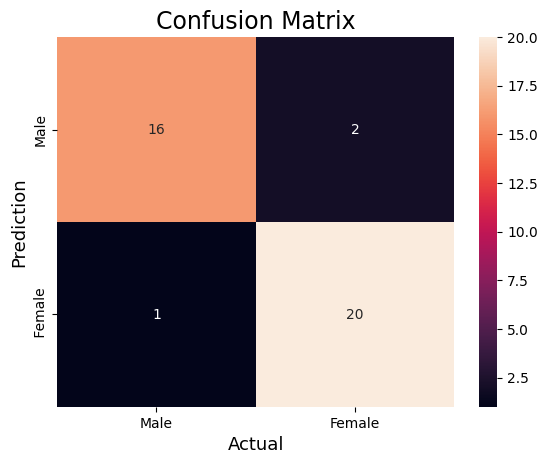

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(y,predicted_value)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Male','Female'],
			yticklabels=['Male',' Female'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
cl_report=classification_report(y,predicted_value)

In [ ]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.91      0.95      0.93        21

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
preci_score=precision_score(y,predicted_value)

In [ ]:
print(preci_score)

0.9090909090909091


In [ ]:
rec_score=recall_score(y,predicted_value)

In [ ]:
print(rec_score)

0.9523809523809523


In [ ]:
f1_s=f1_score(y,predicted_value)

In [ ]:
print(f1_s)

0.9302325581395349
